<p><img alt="udeA logo" height="120px" src="https://github.com/nestorcalvo/DeepLearningProject-NER_Nestor_Santiago/blob/master/udea_escudo.jpeg?raw=True" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>


# <center> <font color='0B5345'>Deep Learning Final Project 2022-1 <br> Named Entity Recognition </font> </center>



## <center>Nestor Rafael Calvo</center>
## <center>Santiago Andres Moreno </center>


As a recomendation, all models runs well in CPU mode but are a little bit slow in the training part, to get faster results we recomend running this notebook using a GPU offered by Colab.

## Imports

In [ ]:
%tensorflow_version 1.x 
%load_ext tensorboard
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import GRU, LSTM, Input, Dense, TimeDistributed, Embedding, Activation, RepeatVector, Bidirectional, Concatenate, Dot,Flatten
from keras.layers import Embedding
from keras.optimizers import adam
import tensorflow as tf
import datetime
from keras.losses import sparse_categorical_crossentropy,categorical_crossentropy
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import codecs
from sklearn.utils.class_weight import compute_class_weight
from seqeval.metrics import  classification_report, f1_score

!pip install seqeval

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Datasets

### Data Download

Both datasets and embeddings are donwloaded from the start to use them trough the project, the dataset is donwloaded from the github repository of the project and the embeddings are donwloaded from a One Drive link due to the limitations in github (<25Mb per file)

In [ ]:
!curl 'https://raw.githubusercontent.com/nestorcalvo/DeepLearningProject/master/ler.txt' -o ler.txt
!curl 'https://raw.githubusercontent.com/nestorcalvo/DeepLearningProject/master/data_ale.txt' -o data_ale.txt
!curl 'https://udeaeduco-my.sharepoint.com/personal/santiago_moreno3_udea_edu_co/_layouts/15/download.aspx?SourceUrl=%2Fpersonal%2Fsantiago%5Fmoreno3%5Fudea%5Fedu%5Fco%2FDocuments%2FGITA%2FMaestr%C3%ADa%2FProgramas%2FNER%2F50mincount%2Evocab' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:100.0) Gecko/20100101 Firefox/100.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' -H 'Accept-Encoding: gzip, deflate, br' -H 'Referer: https://udeaeduco-my.sharepoint.com/personal/santiago_moreno3_udea_edu_co/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fsantiago%5Fmoreno3%5Fudea%5Fedu%5Fco%2FDocuments%2FGITA%2FMaestr%C3%ADa%2FProgramas%2FNER%2F50mincount%2Evocab&parent=%2Fpersonal%2Fsantiago%5Fmoreno3%5Fudea%5Fedu%5Fco%2FDocuments%2FGITA%2FMaestr%C3%ADa%2FProgramas%2FNER' -H 'Upgrade-Insecure-Requests: 1' -H 'Sec-Fetch-Dest: iframe' -H 'Sec-Fetch-Mode: navigate' -H 'Sec-Fetch-Site: same-origin' -H 'Connection: keep-alive' -H 'Cookie: MicrosoftApplicationsTelemetryDeviceId=947bbffc-dd6e-869e-32ed-757743e2163c; MicrosoftApplicationsTelemetryFirstLaunchTime=1654620330830; KillSwitchOverrides_enableKillSwitches=; KillSwitchOverrides_disableKillSwitches=; WSS_FullScreenMode=false; rtFa=agk1BE3A7JgcnrPtg5Gsbz+RASS/fnEWxda0BKzxMu8mOTlFMUU3MjEtNzE4NC00OThFLThBRkYtQjJBRDRFNTNDMUMyIzEzMjk5MDkzOTExNzk1Njk1NyNCMjEzNDVBMC01MDhBLUQwMDAtMUFBNi1BOTNCQzY0MzYwRDkjTkVTVE9SLkNBTFZPJTQwVURFQS5FRFUuQ0+GHIuZ0ND2enMh8aJeXm3k+9YgCjfqjZQA13NFphpf3jVgG9HmWnAeJawIu25YC6aaDClZpVBpjJC4XBskB5qD/W9l00rNnoGcvCAZfcrleQV3lO6+Fk4NhhrKEZi1cLkwpXwT7/jsaMJ1DLCQSz8FolHNS9BXUKzvKmJcj4dWsiTYmQwsgi+MzDRgPfRLXuDiWjIMQ89yjPCOrPP2Zmv3qe4lXZXPcOKJM1fMN5AE8rOxzzx6jhRILaC0nrarfPzzeC684l/42Uq5cZcFTnx+ver4cRGzurt4yoQ0LT1wMr/2tLhNm+QRFxrDvQJQRFDRM8lU+xxkL6R/mYKT9zD9mAAAAA==; FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjEyLDBoLmZ8bWVtYmVyc2hpcHwxMDAzM2ZmZmFmNDgxZTIwQGxpdmUuY29tLDAjLmZ8bWVtYmVyc2hpcHxuZXN0b3IuY2Fsdm9AdWRlYS5lZHUuY28sMTMyOTY3NDc3ODEwMDAwMDAwLDEzMjAyOTYxOTYwMDAwMDAwMCwxMzI5OTUyNTkxMTc4MDA3MTUsMTY3LjAuMTYxLjIxOSwzLDk5ZTFlNzIxLTcxODQtNDk4ZS04YWZmLWIyYWQ0ZTUzYzFjMiwsNTE0NzNlYjAtYTUzNC00MTU5LThhMDQtOGFjNGRlNDRhOTgyLGIyMTM0NWEwLTUwOGEtZDAwMC0xYWE2LWE5M2JjNjQzNjBkOSxiMjEzNDVhMC01MDhhLWQwMDAtMWFhNi1hOTNiYzY0MzYwZDksLDAsMTMyOTkxODAzMTE3NDg4MTM2LDEzMjk5MzUzMTExNzQ4ODEzNiwsLGV5SjRiWE5mWTJNaU9pSmJYQ0pEVURGY0lsMGlMQ0o0YlhOZmMzTnRJam9pTVNJc0ltRmpjbk1pT2lKYlhDSjFjbTQ2ZFhObGNqcHlaV2RwYzNSbGNuTmxZM1Z5YVhSNWFXNW1iMXdpWFNJc0luQnlaV1psY25KbFpGOTFjMlZ5Ym1GdFpTSTZJbTVsYzNSdmNpNWpZV3gyYjBCMVpHVmhMbVZrZFM1amJ5SXNJblYwYVNJNklrZFFUbFJqZDFoWlExVkRlblJtUmxnNE5YZHNRVUVpZlE9PSwxMzI5OTA5NzUxMTc4MDA3MTUsMTMyOTkwOTM5MTAwMDAwMDAwLDcwNzA1YmQ3LTI0MzgtNGFkNi1hN2E5LTUzZGRlMzU2MzA3OCwsLCwsLDAsLGpUeEI2MXhhMVkyY0E2V1BycXVEaTk5VHNtY2gya3pjSmR0VmNmWDZxcXR4SkFQajRWUTI4OEtUZG9yQlRsQkJOMGsvT2pTQnZiZGhuN05QU1JWM1haV2YzU1dRQlN4NlQyUnl2ZFZoS3VUZldVSWhnOWRVdHo0QVl3eU1yWG5xWVoxOEJlVzlGTjA5Z2IzSzdrbE1QS1crL204Z1J1UXFFTWg5NDNaY08wVHJaZTc4Yk9ISmJhbGtJMUZVc3hmcjhGazJ1cm9UNzNLbW1ZdXgvOVpBOWEvSThmVSt4UFN0Tlh0eTBMdTlLL2pkUzNYUDNJV2RZa0hZZ0xhcXRseDVWWEpMRHJaTjNiMUVnSlZqNytaNDdTcE50N1pWQk55dXhrT2JJT0cwY09zb0tZaVB5VFJIcjZUUmVaN042ckU5QlV1b2FjZVA3dDExZGJDR1gyRjF5QT09PC9TUD4=; CCSInfo=MTIvMDYvMjAyMiAxNjo1MDoxMVCQt1TUY48+5ebJRZr3AlvdMk7zIyjQBu1Ogr095qPslNunOEHz0V4CLqYCPxvveGA46C+F8+Xgrq1PzMg2Kxw0XsPLd2nwPkiEkvEyjBm1px0NAciD+WaHxp9X5aUFhTRisCLhGU1d6L3fr2pyT2Aacz2zz0WEblwl/SEQOkxXXcUj7a98KNlmytAIUQUpMBFjRiPoBNP8rrjL57qCgZ9tlHgKtT4OaTvPnI5VJ17DVUtuD0HpbukqdXlca2BL3UJ1Mrh14oo1GjTs17d1lJMjB37JopS6lLROvduxh1sS0ONo7dElc16xkva3bTNNPVJIOLGD7ohKhbx70pEL0dMTAAAA; cucg=1' -o mincount.vocab

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.7M  100 18.7M    0     0  19.4M      0 --:--:-- --:--:-- --:--:-- 19.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.9M  100 20.9M    0     0  21.5M      0 --:--:-- --:--:-- --:--:-- 21.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  602M  100  602M    0     0  21.2M      0  0:00:28  0:00:28 --:--:-- 29.7M


### Data Load

First we need to read the dataset from the .txt file, the dataset consist of different prhases, for each line of the file we have the word and the label. Each prhase is separated by an empty line. We extract each text or phrase and the labels for that specific text, we also extract the total labels and words that are in the database.

In [ ]:
#Data load
with open("data_ale.txt", encoding = "utf-8") as archivo:
    file = archivo.read()
clases= ['B-AN','B-RS','B-GS','B-GRT','B-EUN','B-LIT','B-LD','B-RR','B-VT','B-ORG',
         'B-INN','B-VS','B-ST','B-VO','B-UN','B-PER','B-LDS','B-STR','B-MRK',
         'I-AN','I-RS','I-GS','I-GRT','I-EUN','I-LIT','I-LD','I-RR','I-VT','I-ORG',
         'I-INN','I-VS','I-ST','I-VO','I-UN','I-PER','I-LDS','I-STR','I-MRK', "O"]
file_list=file.split('\n\n')

texts = []
labels = []
total_labels = []
words_total = []

for s in file_list:
    sentence=[]
    sent_label=[]
    
    for w in s.split('\n'): 
        if w: 
            words_total.append(w.split(' ')[0])
            sentence.append(w.split(' ')[0])
            lab=w.split(' ')[1]
            #if lab != 'O': lab = lab.split('-')[1]
            sent_label.append(clases.index(lab))
            total_labels.append(clases.index(lab))
    
    texts.append(sentence)
    labels.append(sent_label)



### Data Anlysis

Befor jumping in to the model creation is important to find basic metrics of the dataset, to analyze how balance is the dataset and so. This will be helpful because we can ajust the model later on if ther is an inbalance in this dataset. To check this, we plot a bar plot to identify the ammount of samples for each classes.

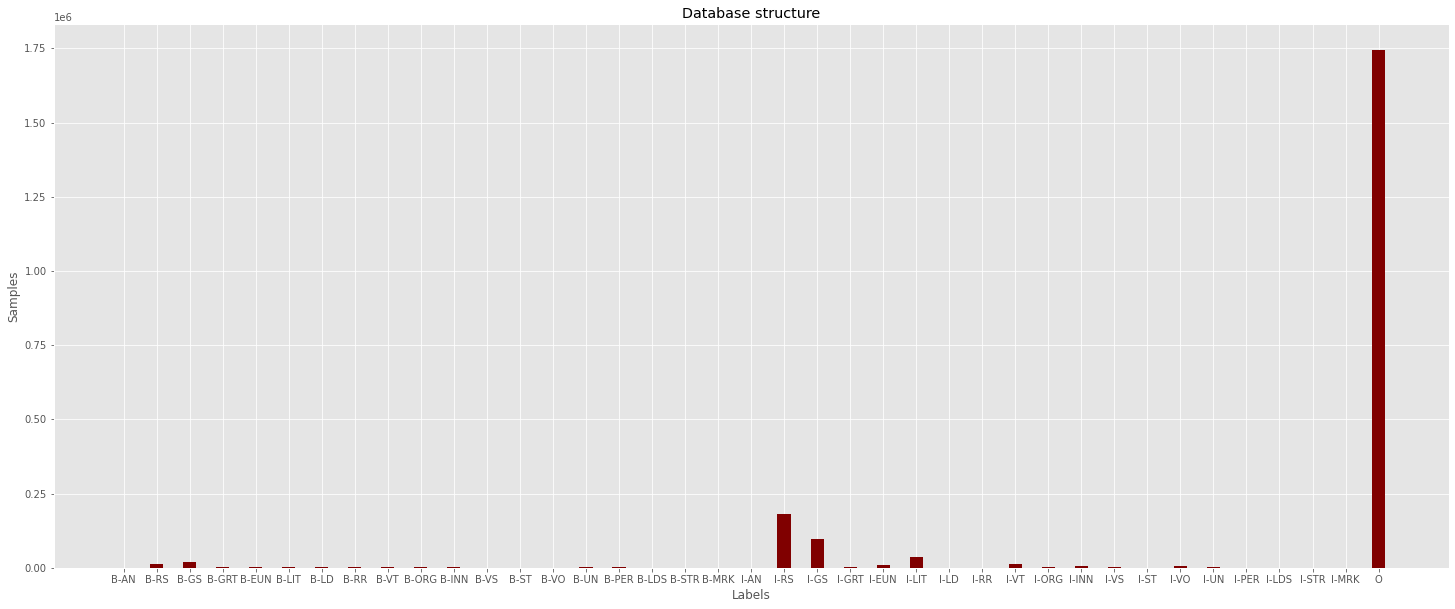

In [ ]:
#Data Analysis
dict_classes = dict()
for index, item in enumerate(clases):
  dict_classes[item] = total_labels.count(index)
  #print("Class {} has {} ocurrencies".format(item, total_labels.count(index)))

fig= plt.figure(figsize =(25, 10))
plt.bar(list(dict_classes.keys()), list(dict_classes.values()), color ='maroon',
        width = 0.4)
plt.xlabel("Labels")
plt.ylabel("Samples")
plt.title("Database structure")
plt.show()

#print(dict_classes)

This graph shows that there is a high imbalance in the database, this is cause because most of the words are categorized as OTHER ("O") so there are few entitites in a text. This imbalance will affect the model in the future, because the model will not be able to generalize and will label almost all new samples as "O".

Another thing that its important to check is how long the texts are in the dataset, this help us to check if there is any outlayer that and also will help us to select a value to normalize all the text.

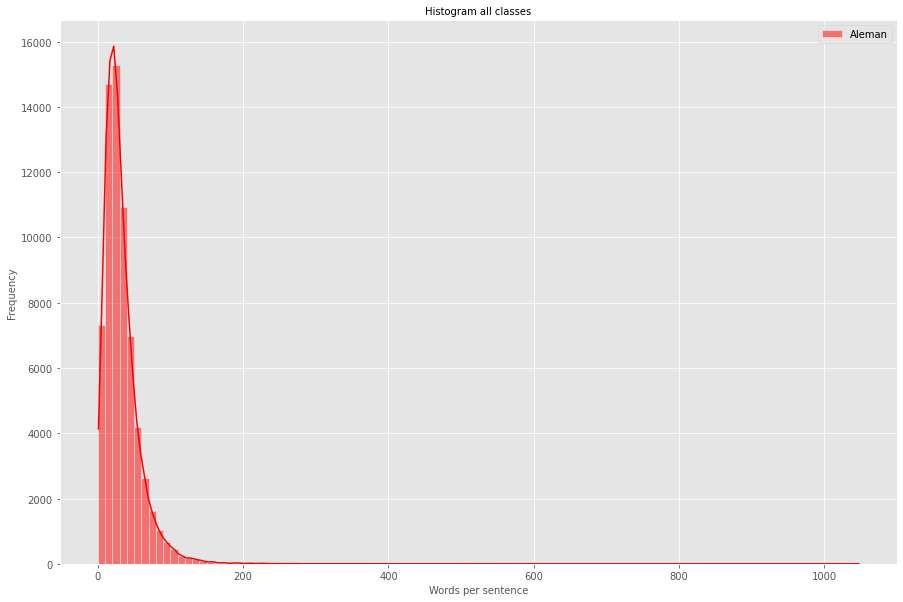

In [ ]:
  
def check_create(path):
    import os
    if not (os.path.isdir(path)):
        os.makedirs(path)

with codecs.open('ler.txt', encoding='utf-8') as f:
    lines = f.readlines()

groups_norm=[]
groups=[]
g=0
X_norm=[]
y_norm=[]
count=0
for l in lines:
    if l == '\n':
        groups.append(count)
        count=0
    else:
        count+=1
#plt.subplot(211)
fig = plt.figure(figsize=(15,10))
sns.histplot(groups, bins=range(0,200,10), color="r", kde=True, label = "Aleman")
plt.legend()
plt.title('Histogram all classes', fontsize=10)
plt.xlabel('Words per sentence', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()


After ploting a histogram we can notice that there are text that had >1000 words, this can be considered as an outlier and can be removed from the database. To find a tresshold we find the 99 percentile so we are sure that 99% of the data is bellow that point and we don't lose a lot of information

In [ ]:
percentile=stats.scoreatpercentile(groups, 99)
print("The percentile 99 of the sentence length is: ", percentile)

The percentile 99 of the sentence length is:  120.0


We found that 120 words is the 99 percentile so all texts that has more that 120 words will be removed from the dataset and texts with less than 120 words will be padded later on in the recurrent stage.

## Embeddings and data preparation

Another dataset that is important to preprocess is the embeddings dataset, this embeddings are taken from "citar",

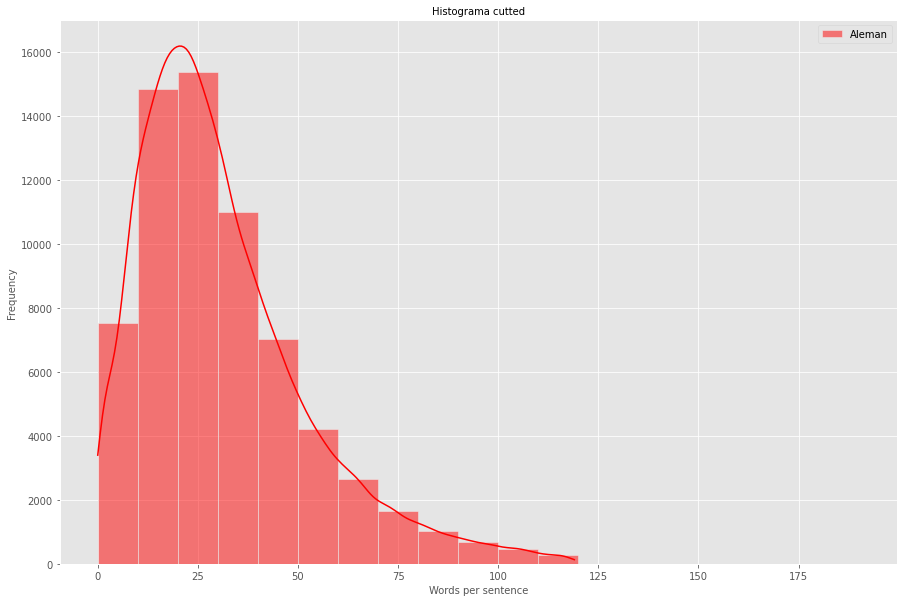

In [ ]:

groups_norm=[]
groups_new=[]
g=0
X_norm=[]
y_norm=[]
count=0
for l in lines:
    if l == '\n':
        groups_new.append(count)
        count=0
        g+=1
    else:
        count+=1
        X_norm.append(l.split(" ")[0])
        y_norm.append(l.split(" ")[1][:-1])
        groups_norm.append(g)
        if count>=120:
          g+=1
          count=0 

X=np.asarray(X_norm)
y=np.asarray(y_norm)

fig = plt.figure(figsize=(15,10))
sns.histplot(groups_new, bins=range(0,200,10), color="r", kde=True, label = "Aleman")
plt.legend()
plt.title('Histograma cutted', fontsize=10)
plt.xlabel('Words per sentence', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

In [ ]:
#Index and words for data
MAX_SEQUENCE_LENGTH=120

words = ["PADDING"]+list(set(words_total))
n_words = len(words)

word2idx = {w: i for i, w in enumerate(words)}
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(clases)}

In [ ]:

#Prepare the embeddings dictionary from static embeddings
embeddings_index = {}
f = open('mincount.vocab')

for line in f:
    # Select combination of words and coeficient from .vocab, store this in a dictionary
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
#Prepare embeddings matrix to use in the model
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((n_words, EMBEDDING_DIM))

for word in words:
    embedding_vector = embeddings_index.get(word)
    # words not found in embedding index will be all-zeros.
    if embedding_vector is not None:
        embedding_vector = embeddings_index.get(word)
        embedding_matrix[word2idx[word]] = embedding_vector
    else:
        embedding_vector = embeddings_index.get("UNKNOWN")
        embedding_matrix[word2idx[word]] = embedding_vector
        

## Models

### Basic sequential model

First we will be using dense layers to check if analyzing each word separatelly will be enough to train a good model, first we need to structure our X and Y variables, X contains a list of each word in the dataset.

The dataset is also divided in train and test.

In [ ]:
X = np.asarray([word2idx[w] for w in words_total])
y = np.asarray([y_i for y_i in total_labels])
y = y.reshape(y.shape[0],1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

print('Shape of train data tensor:', X_train.shape)
print('Shape of train label tensor:', y_train.shape)

print('Shape of test data tensor:', X_test.shape)
print('Shape of test label tensor:', y_test.shape)

Shape of data tensor: (2157048,)
Shape of label tensor: (2157048, 1, 1)
Shape of train data tensor: (1725638,)
Shape of train label tensor: (1725638, 1, 1)
Shape of test data tensor: (431410,)
Shape of test label tensor: (431410, 1, 1)


In [ ]:
def basic_model(input_shape, output_sequence_length, words_number,embedding_dim,embedding_matrix):
   
    learning_rate = 0.001
    model = Sequential()
    # Match each word with an embedding
    model.add(Embedding(words_number,embedding_dim, weights=[embedding_matrix],input_length=input_shape))

    # Hidden layers
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))

    # Output layer
    model.add(Dense(output_sequence_length, activation = 'softmax'))

    model.compile(loss = sparse_categorical_crossentropy, optimizer = adam(learning_rate),metrics=['accuracy'],sample_weight_mode="temporal")
    return model

In [ ]:
#For this basic model the input shape will be 1 because we are analyzing word by word
basic = basic_model(1,len(clases),n_words,EMBEDDING_DIM,embedding_matrix)
basic.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1, 100)            8158200   
_________________________________________________________________
dense_6 (Dense)              (None, 1, 512)            51712     
_________________________________________________________________
dense_7 (Dense)              (None, 1, 256)            131328    
_________________________________________________________________
dense_8 (Dense)              (None, 1, 128)            32896     
_________________________________________________________________
dense_9 (Dense)              (None, 1, 39)             5031      
Total params: 8,379,167
Trainable params: 8,379,167
Non-trainable params: 0
_________________________________________________________________


Train on 1207946 samples, validate on 517692 samples
Epoch 1/10
1207946/1207946 [==============================] - 9s 7us/step - loss: 2.3728 - accuracy: 0.5808 - val_loss: 1.7794 - val_accuracy: 0.6114
Epoch 2/10
1207946/1207946 [==============================] - 8s 7us/step - loss: 1.4477 - accuracy: 0.6282 - val_loss: 1.6360 - val_accuracy: 0.6260
Epoch 3/10
1207946/1207946 [==============================] - 8s 7us/step - loss: 1.2049 - accuracy: 0.6516 - val_loss: 1.5707 - val_accuracy: 0.6295
Epoch 4/10
1207946/1207946 [==============================] - 8s 7us/step - loss: 1.1398 - accuracy: 0.6580 - val_loss: 1.5868 - val_accuracy: 0.6365
Epoch 5/10
1207946/1207946 [==============================] - 9s 7us/step - loss: 1.0743 - accuracy: 0.6600 - val_loss: 1.6013 - val_accuracy: 0.6308
Epoch 6/10
1207946/1207946 [==============================] - 9s 8us/step - loss: 1.0526 - accuracy: 0.6589 - val_loss: 1.7118 - val_accuracy: 0.6308
Epoch 7/10
1207946/1207946 [===================

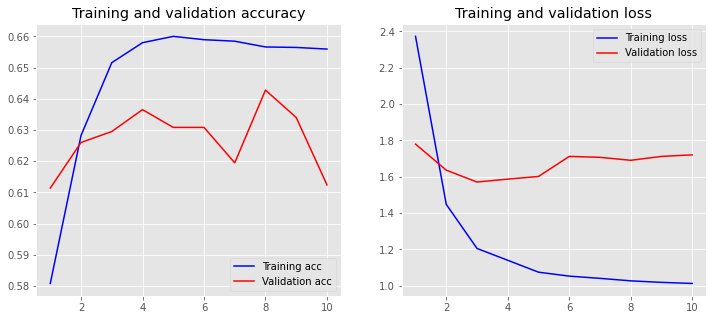

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Array with all the classes
classes = np.arange(len(clases))
# Create a weigth list for the classes
weights = compute_class_weight(class_weight = 'balanced', classes =classes, y = total_labels)
# For each sample in y_train a weigth is assinged 
weights_list = []
for item in list(np.array(y_train).reshape(-1,1)):
  weights_list.append(weights[item])

history = basic.fit(X_train,y_train,batch_size=1000, epochs=10, validation_split=0.3, verbose=1, sample_weight= np.array(weights_list))

# Function to plot the results
plt.style.use('ggplot')
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy , 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

-----

### Recurrent models

In order to use recurrent models the data must be rearenge, this time we will not be check word by word, instead, we will analyzing the whole sentence (all sentences have a length of 120)

In [ ]:
X = [[word2idx[w] for w in s] for s in texts]
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding="post",value=words.index("PADDING"))
y = pad_sequences(labels, maxlen=MAX_SEQUENCE_LENGTH, padding="post",value=clases.index("O"))

#y = to_categorical(np.asarray(y))
y = y.reshape(y.shape[0],y.shape[1],1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

print('Shape of train data tensor:', X_train.shape)
print('Shape of train label tensor:', y_train.shape)

print('Shape of test data tensor:', X_test.shape)
print('Shape of test label tensor:', y_test.shape)

Shape of data tensor: (67430, 120)
Shape of label tensor: (67430, 120, 1)
Shape of train data tensor: (53944, 120)
Shape of train label tensor: (53944, 120, 1)
Shape of test data tensor: (13486, 120)
Shape of test label tensor: (13486, 120, 1)


In [ ]:
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy , 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


def pred2label(pred):
   out = []
   for pred_i in pred:
       out_i = []
       for p in pred_i:
           p_i = np.argmax(p)
           out_i.append(idx2tag[p_i].replace("PADDING", "O"))
       out.append(out_i)
   return out

def test2label(pred):
   out = []
   for pred_i in pred:
       out_i = []
       for p in pred_i:
           out_i.append(idx2tag[p[0]].replace("PADDING", "O"))
       out.append(out_i)
   return out

idx2tag = {i: w for w, i in tags2index.items()}

In the Data Analysis we notice an unbalance in the dataset, where most of the data is from the class "O", this will train a model that won't be able to generalize, to supress this issue we assinged weights to each class, in this case for the class "O" the weight is 0 because we don't want this class to affect the performance of our model.

In [ ]:
classes = np.arange(len(clases))
weights = compute_class_weight(class_weight = 'balanced', classes =classes, y = total_labels)
weights[-1] = 0

#### LSTM

In [64]:
def recurrent_model_LSTM(input_shape, output_sequence_length, words_number,embedding_dim,embedding_matrix):
   
    learning_rate = 0.001
    word_embedding_size = 100
    model = Sequential()
    model.add(Embedding(words_number,embedding_dim, weights=[embedding_matrix],input_length=input_shape))

    model.add(LSTM(units = 100, dropout = 0.25, return_sequences = True))

    model.add(TimeDistributed(Dense(output_sequence_length, activation = 'softmax')))
    model.compile(loss = sparse_categorical_crossentropy, 
                 optimizer = adam(learning_rate),metrics=['accuracy'])
    return model

In [65]:
lstm = recurrent_model_LSTM(120,len(clases),n_words,EMBEDDING_DIM,embedding_matrix)
lstm.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 100)          8158200   
_________________________________________________________________
lstm_12 (LSTM)               (None, 120, 100)          80400     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 120, 39)           3939      
Total params: 8,242,539
Trainable params: 8,242,539
Non-trainable params: 0
_________________________________________________________________


Train on 37760 samples, validate on 16184 samples
Epoch 1/10
37760/37760 [==============================] - 6s 150us/step - loss: 1.2733 - accuracy: 0.8824 - val_loss: 0.3828 - val_accuracy: 0.9486
Epoch 2/10
37760/37760 [==============================] - 5s 123us/step - loss: 0.3451 - accuracy: 0.9487 - val_loss: 0.3154 - val_accuracy: 0.9486
Epoch 3/10
37760/37760 [==============================] - 5s 123us/step - loss: 0.2745 - accuracy: 0.9487 - val_loss: 0.2140 - val_accuracy: 0.9488
Epoch 4/10
37760/37760 [==============================] - 5s 124us/step - loss: 0.1812 - accuracy: 0.9592 - val_loss: 0.1537 - val_accuracy: 0.9667
Epoch 5/10
37760/37760 [==============================] - 5s 122us/step - loss: 0.1420 - accuracy: 0.9695 - val_loss: 0.1275 - val_accuracy: 0.9766
Epoch 6/10
37760/37760 [==============================] - 5s 123us/step - loss: 0.1199 - accuracy: 0.9773 - val_loss: 0.1098 - val_accuracy: 0.9787
Epoch 7/10
37760/37760 [==============================] - 5s 1

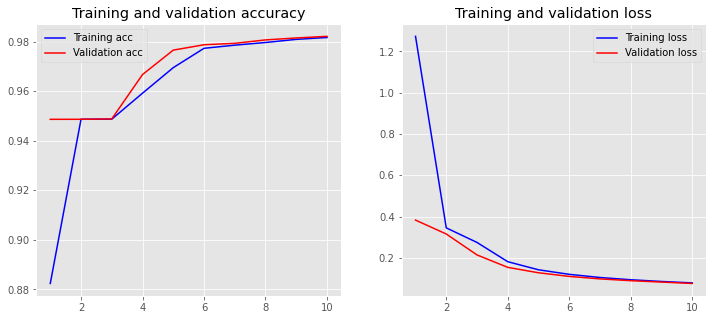

In [66]:
history_lstm = lstm.fit(X_train, y_train, batch_size=1000, epochs=10, validation_split=0.3, verbose=1,class_weight=weights)
plt.style.use('ggplot')
plot_history(history_lstm)

In [ ]:
test_pred = lstm.predict(np.array(X_test), verbose=1)
pred_labels = pred2label(test_pred)
test_labels = test2label(y_test)
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

13486/13486 [==============================] - 16s 1ms/step
F1-score: 35.5%


#### LSTM Bidirectional

In [67]:
def recurrent_model_LSTM_BI(input_shape, output_sequence_length, words_number,embedding_dim,embedding_matrix):
   
    learning_rate = 0.001
    word_embedding_size = 100
    model = Sequential()
    model.add(Embedding(words_number,embedding_dim, weights=[embedding_matrix],input_length=input_shape))

    model.add(Bidirectional(LSTM(units = 100, dropout = 0.25, return_sequences = True)))

    model.add(TimeDistributed(Dense(output_sequence_length, activation = 'softmax')))
    model.compile(loss = sparse_categorical_crossentropy, 
                 optimizer = adam(learning_rate),metrics=['accuracy'])
    return model

In [68]:
lstm_bi = recurrent_model_LSTM_BI(120,len(clases),n_words,EMBEDDING_DIM,embedding_matrix)
lstm_bi.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 120, 100)          8158200   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 120, 200)          160800    
_________________________________________________________________
time_distributed_10 (TimeDis (None, 120, 39)           7839      
Total params: 8,326,839
Trainable params: 8,326,839
Non-trainable params: 0
_________________________________________________________________


Train on 37760 samples, validate on 16184 samples
Epoch 1/10
37760/37760 [==============================] - 10s 259us/step - loss: 0.9999 - accuracy: 0.9072 - val_loss: 0.2943 - val_accuracy: 0.9486
Epoch 2/10
37760/37760 [==============================] - 8s 225us/step - loss: 0.2408 - accuracy: 0.9489 - val_loss: 0.1833 - val_accuracy: 0.9502
Epoch 3/10
37760/37760 [==============================] - 8s 224us/step - loss: 0.1591 - accuracy: 0.9603 - val_loss: 0.1358 - val_accuracy: 0.9661
Epoch 4/10
37760/37760 [==============================] - 9s 226us/step - loss: 0.1252 - accuracy: 0.9696 - val_loss: 0.1121 - val_accuracy: 0.9739
Epoch 5/10
37760/37760 [==============================] - 8s 225us/step - loss: 0.1027 - accuracy: 0.9766 - val_loss: 0.0914 - val_accuracy: 0.9788
Epoch 6/10
37760/37760 [==============================] - 8s 225us/step - loss: 0.0853 - accuracy: 0.9797 - val_loss: 0.0779 - val_accuracy: 0.9813
Epoch 7/10
37760/37760 [==============================] - 9s 

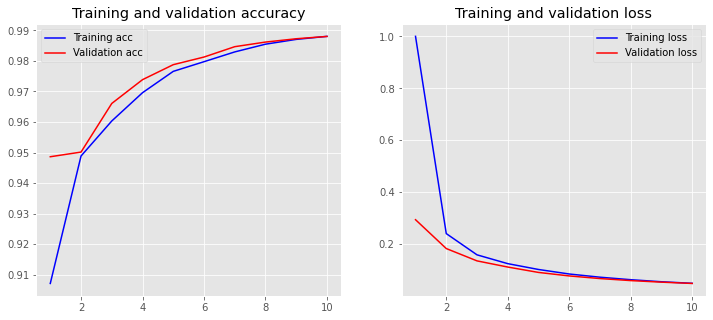

In [69]:
history_lstm_bi = lstm_bi.fit(X_train, y_train, batch_size=1000, epochs=10, validation_split=0.3, verbose=1,class_weight=weights)
plt.style.use('ggplot')
plot_history(history_lstm_bi)

In [ ]:
test_pred = lstm_bi.predict(np.array(X_test), verbose=1)
pred_labels = pred2label(test_pred)
test_labels = test2label(y_test)
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

13486/13486 [==============================] - 31s 2ms/step
F1-score: 43.7%


#### LSTM-LSTM

In [ ]:
def recurrent_model_LSTM_LSTM(input_shape, output_sequence_length, words_number,embedding_dim,embedding_matrix):
   
    learning_rate = 0.001
    word_embedding_size = 100
    model = Sequential()
    model.add(Embedding(words_number,embedding_dim, weights=[embedding_matrix],input_length=input_shape))

    model.add(LSTM(units = 100, dropout = 0.25, return_sequences = True))
    model.add(LSTM(units = 100, dropout = 0.25, return_sequences = True))

    model.add(TimeDistributed(Dense(output_sequence_length, activation = 'softmax')))
    model.compile(loss = sparse_categorical_crossentropy, 
                 optimizer = adam(learning_rate),metrics=['accuracy'])
    return model

In [ ]:
lstm_2 = recurrent_model_LSTM_LSTM(120,len(clases),n_words,EMBEDDING_DIM,embedding_matrix)
lstm_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 100)          8158200   
_________________________________________________________________
lstm_5 (LSTM)                (None, 120, 100)          80400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 120, 100)          80400     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 120, 39)           3939      
Total params: 8,322,939
Trainable params: 8,322,939
Non-trainable params: 0
_________________________________________________________________


Train on 37760 samples, validate on 16184 samples
Epoch 1/10
37760/37760 [==============================] - 9s 245us/step - loss: 1.0683 - accuracy: 0.9109 - val_loss: 0.3789 - val_accuracy: 0.9486
Epoch 2/10
37760/37760 [==============================] - 9s 247us/step - loss: 0.3609 - accuracy: 0.9487 - val_loss: 0.3442 - val_accuracy: 0.9486
Epoch 3/10
37760/37760 [==============================] - 9s 226us/step - loss: 0.3362 - accuracy: 0.9487 - val_loss: 0.3249 - val_accuracy: 0.9486
Epoch 4/10
37760/37760 [==============================] - 9s 227us/step - loss: 0.3069 - accuracy: 0.9487 - val_loss: 0.2653 - val_accuracy: 0.9486
Epoch 5/10
37760/37760 [==============================] - 9s 225us/step - loss: 0.2176 - accuracy: 0.9504 - val_loss: 0.1694 - val_accuracy: 0.9635
Epoch 6/10
37760/37760 [==============================] - 9s 226us/step - loss: 0.1562 - accuracy: 0.9636 - val_loss: 0.1383 - val_accuracy: 0.9672
Epoch 7/10
37760/37760 [==============================] - 9s 2

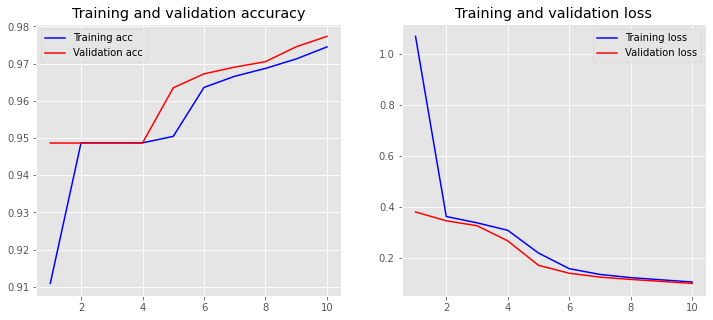

In [ ]:
history_lstm_2 = lstm_2.fit(X_train, y_train, batch_size=1000, epochs=10, validation_split=0.3, verbose=1,class_weight=weights)
plt.style.use('ggplot')
plot_history(history_lstm_2)

In [ ]:
test_pred = lstm_2.predict(np.array(X_test), verbose=1)
pred_labels = pred2label(test_pred)
test_labels = test2label(y_test)
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

13486/13486 [==============================] - 31s 2ms/step
F1-score: 9.7%


#### LSTM Bidirectional - LSTM Bidirectional

In [ ]:
def recurrent_model_LSTM_BI_LSTM_BI(input_shape, output_sequence_length, words_number,embedding_dim,embedding_matrix):
   
    learning_rate = 0.001
    word_embedding_size = 100
    model = Sequential()
    model.add(Embedding(words_number,embedding_dim, weights=[embedding_matrix],input_length=input_shape))

    model.add(Bidirectional(LSTM(units = 100, dropout = 0.25, return_sequences = True)))
    model.add(Bidirectional(LSTM(units = 100, dropout = 0.25, return_sequences = True)))

    model.add(TimeDistributed(Dense(output_sequence_length, activation = 'softmax')))
    model.compile(loss = sparse_categorical_crossentropy, 
                 optimizer = adam(learning_rate),metrics=['accuracy'])
    return model

In [ ]:
two_bi = recurrent_model_LSTM_BI_LSTM_BI(120,len(clases),n_words,EMBEDDING_DIM,embedding_matrix)
two_bi.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 100)          8158200   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 120, 200)          160800    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 120, 200)          240800    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 120, 39)           7839      
Total params: 8,567,639
Trainable params: 8,567,639
Non-trainable params: 0
_________________________________________________________________


Train on 37760 samples, validate on 16184 samples
Epoch 1/10
37760/37760 [==============================] - 17s 461us/step - loss: 0.7835 - accuracy: 0.9208 - val_loss: 0.2858 - val_accuracy: 0.9486
Epoch 2/10
37760/37760 [==============================] - 16s 428us/step - loss: 0.2224 - accuracy: 0.9501 - val_loss: 0.1669 - val_accuracy: 0.9618
Epoch 3/10
37760/37760 [==============================] - 16s 430us/step - loss: 0.1422 - accuracy: 0.9653 - val_loss: 0.1199 - val_accuracy: 0.9718
Epoch 4/10
37760/37760 [==============================] - 16s 433us/step - loss: 0.1113 - accuracy: 0.9743 - val_loss: 0.0963 - val_accuracy: 0.9782
Epoch 5/10
37760/37760 [==============================] - 16s 428us/step - loss: 0.0912 - accuracy: 0.9786 - val_loss: 0.0815 - val_accuracy: 0.9801
Epoch 6/10
37760/37760 [==============================] - 16s 429us/step - loss: 0.0775 - accuracy: 0.9811 - val_loss: 0.0705 - val_accuracy: 0.9831
Epoch 7/10
37760/37760 [==============================] 

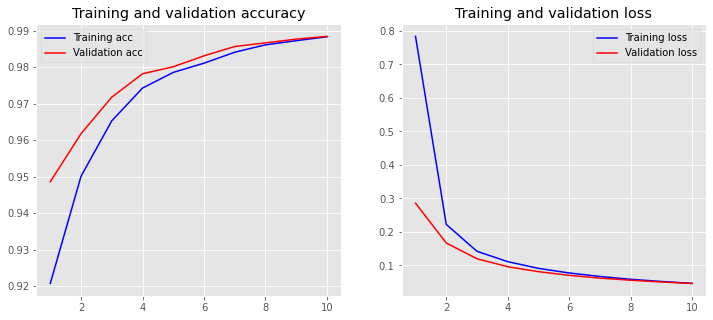

In [ ]:
history_two_bi = two_bi.fit(X_train, y_train, batch_size=1000, epochs=10, validation_split=0.3, verbose=1,class_weight=weights)
plt.style.use('ggplot')
plot_history(history_two_bi)

In [54]:
test_pred = two_bi.predict(np.array(X_test), verbose=1)
pred_labels = pred2label(test_pred)
test_labels = test2label(y_test)
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

13486/13486 [==============================] - 60s 4ms/step
F1-score: 47.9%


### Results

The classification report is extracted from the best model

In [55]:
print(classification_report(test_labels, pred_labels))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AN       0.00      0.00      0.00        30
         EUN       0.01      0.02      0.01       260
         GRT       0.20      0.02      0.04       626
          GS       0.53      0.80      0.64      3680
         INN       0.00      0.00      0.00       416
          LD       0.00      0.00      0.00       274
         LDS       0.00      0.00      0.00        39
         LIT       0.24      0.50      0.33       543
         MRK       0.00      0.00      0.00        63
         ORG       0.00      0.00      0.00       242
         PER       0.00      0.00      0.00       335
          RR       0.00      0.00      0.00       297
          RS       0.60      0.69      0.64      2589
          ST       0.00      0.00      0.00       155
         STR       0.00      0.00      0.00        20
          UN       0.00      0.00      0.00       233
          VO       0.00      0.00      0.00       147
          VS       0.00    